# Duffing Oscillator Solution

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

In [2]:
# Test that all is working.
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1]]), .7)
x

array([[-0.34996508,  1.36054018, -1.11828552]])

In [3]:
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1,0,0,0,0]]), .7, f_tol = 1e-10)
print(x)
print(sp.fftpack.fft(x))


[[-0.34850556  0.98635512  1.41526032  0.95129854 -0.40091298 -1.31613416
  -1.29636388]]
[[-0.00900260+0.j         -1.05973076-5.0343169j  -0.02567193+0.01682272j
  -0.12986547-0.17325323j -0.12986547+0.17325323j -0.02567193-0.01682272j
  -1.05973076+5.0343169j ]]


In [4]:
x.shape[1]

7

In [5]:
sp.fftpack.fft(x)

array([[-0.00900260+0.j        , -1.05973076-5.0343169j ,
        -0.02567193+0.01682272j, -0.12986547-0.17325323j,
        -0.12986547+0.17325323j, -0.02567193-0.01682272j,
        -1.05973076+5.0343169j ]])

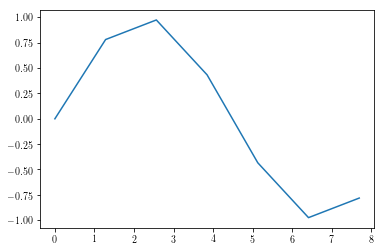

In [6]:
plt.plot(t,sin(0.7*t))

In [7]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return -x-.1*x**3-.01*v+1*sin(omega*t)

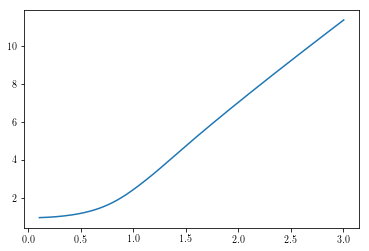

In [8]:
omega = sp.linspace(0.1,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq)#, f_tol = 1e-10)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

The break is an indicative of a break in the branch and is actually a result of the `solution` being unstable.  Not the system, but the solution. By that we mean that while this is considered a solution, it isn't one that will actually continue in a real situation and another solution will necessarily be found. 

A simple solution is to change the starting guess to be away from the solution and see if it finds another one. Indeed that happens. 



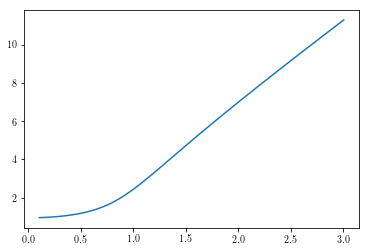

In [9]:
omega = sp.linspace(0.1,3,90)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0,0,0,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    #print(sp.average(x))
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, verbose = False, f_tol = 1e-6)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

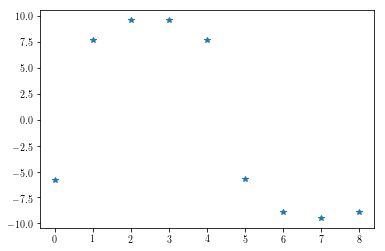

In [10]:
plt.plot(x.T,'*')

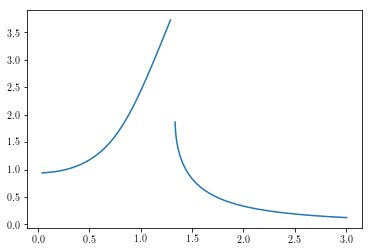

In [11]:
omegal = sp.arange(3,.03,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1,0,0,0,0]])
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, f_tol = 1e-6)#, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = sp.nan
plt.plot(omegal, ampl)

In [12]:
x

array([[ -3.77917168e-04,   7.41933175e-01,   9.02875609e-01,
          4.27087719e-01,  -4.26443181e-01,  -9.02742742e-01,
         -7.42334120e-01]])

In [13]:
sp.fftpack.fft(x)

array([[ -1.45712276e-06+0.j        ,  -1.23817644e-03-3.29112781j,
         -6.54449857e-06+0.00369216j,  -7.72605884e-05-0.06444127j,
         -7.72605884e-05+0.06444127j,  -6.54449857e-06-0.00369216j,
         -1.23817644e-03+3.29112781j]])

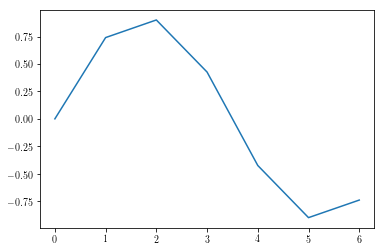

In [14]:
plt.plot(x.T)

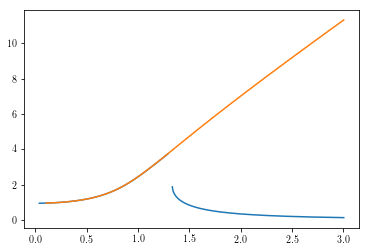

In [15]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [16]:
from scipy.optimize import newton_krylov

In [18]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [60]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [61]:
newton_krylov(duff_amp_resid,-.1)

array(-0.5478691201747141)

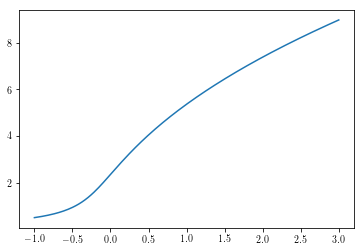

In [82]:
sigmas = sp.linspace(-1,3,200)
amplitudes = sp.zeros_like(aa)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

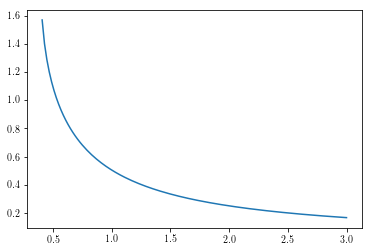

In [88]:
sigmas = sp.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = sp.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

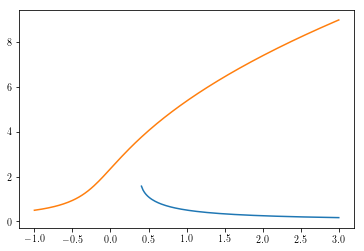

In [89]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)